## Data Collection

In [1]:
import pandas_datareader as pdr
key="d09aa7d2edec57e0978f857dcde4186dd54fd222"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-07-31 00:00:00+00:00,148.73,150.330,148.13,149.900,19422655,35.193025,35.571623,35.051051,35.469875,77690620,0.0,1.0
1,AAPL,2017-08-01 00:00:00+00:00,150.05,150.220,148.41,149.100,24725526,35.505368,35.545594,35.117306,35.280576,98902104,0.0,1.0
2,AAPL,2017-08-02 00:00:00+00:00,157.14,159.750,156.16,159.280,69222793,37.183030,37.800617,36.951138,37.689404,276891172,0.0,1.0
3,AAPL,2017-08-03 00:00:00+00:00,155.57,157.210,155.02,157.050,26000738,36.811530,37.199593,36.681388,37.161733,104002952,0.0,1.0
4,AAPL,2017-08-04 00:00:00+00:00,156.39,157.400,155.69,156.070,20349532,37.005562,37.244552,36.839925,36.929842,81398128,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,AAPL,2022-07-25 00:00:00+00:00,152.95,155.040,152.28,154.010,53623945,152.950000,155.040000,152.280000,154.010000,53623945,0.0,1.0
1255,AAPL,2022-07-26 00:00:00+00:00,151.60,153.085,150.80,152.265,55138691,151.600000,153.085000,150.800000,152.265000,55138691,0.0,1.0
1256,AAPL,2022-07-27 00:00:00+00:00,156.79,157.330,152.16,152.580,78620688,156.790000,157.330000,152.160000,152.580000,78620688,0.0,1.0
1257,AAPL,2022-07-28 00:00:00+00:00,157.35,157.640,154.41,156.980,81378731,157.350000,157.640000,154.410000,156.980000,81378731,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2022-07-25 00:00:00+00:00,152.95,155.040,152.28,154.010,53623945,152.95,155.040,152.28,154.010,53623945,0.0,1.0
1255,AAPL,2022-07-26 00:00:00+00:00,151.60,153.085,150.80,152.265,55138691,151.60,153.085,150.80,152.265,55138691,0.0,1.0
1256,AAPL,2022-07-27 00:00:00+00:00,156.79,157.330,152.16,152.580,78620688,156.79,157.330,152.16,152.580,78620688,0.0,1.0
1257,AAPL,2022-07-28 00:00:00+00:00,157.35,157.640,154.41,156.980,81378731,157.35,157.640,154.41,156.980,81378731,0.0,1.0
1258,AAPL,2022-07-29 00:00:00+00:00,162.51,163.630,159.50,161.240,101786860,162.51,163.630,159.50,161.240,101786860,0.0,1.0


In [8]:
df1=df.reset_index()['close']
df1

0       148.73
1       150.05
2       157.14
3       155.57
4       156.39
         ...  
1254    152.95
1255    151.60
1256    156.79
1257    157.35
1258    162.51
Name: close, Length: 1259, dtype: float64

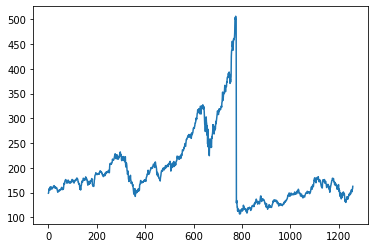

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.10492173]
 [0.10822793]
 [0.12598622]
 ...
 [0.12510958]
 [0.12651221]
 [0.13943644]]


## Splitting the dataset

In [13]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size, test_size

(818, 441)

## Convert an array of values into a dataset matrix

In [15]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Creating stacked LSTM model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 20s 677ms/step - loss: 0.0497 - val_loss: 0.0041
Epoch 2/100
12/12 [==============================] - 4s 332ms/step - loss: 0.0150 - val_loss: 0.0090
Epoch 3/100
12/12 [==============================] - 3s 273ms/step - loss: 0.0123 - val_loss: 6.3955e-04
Epoch 4/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0101 - val_loss: 2.9921e-04
Epoch 5/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0093 - val_loss: 2.7080e-04
Epoch 6/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0083 - val_loss: 5.9109e-04
Epoch 7/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0070 - val_loss: 2.3738e-04
Epoch 8/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0070 - val_loss: 2.2390e-04
Epoch 9/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0076 - val_loss: 0.0015
Epoch 10/100
12/12 [==============================] - 2s 200ms/ste

In [24]:
import tensorflow as tf

## Prediction

In [25]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [26]:
print(X_train.shape)

(717, 100, 1)


In [27]:
print(train_predict.shape)

(717, 1)


## Tranform back to original form**

In [28]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
print(ytest.shape)

(340,)


In [30]:
ytest=ytest.reshape(340,1)
ytest=scaler.inverse_transform(ytest)

## RMSE performance Metrics

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

232.97142564664347

In [32]:
math.sqrt(mean_squared_error(ytest,test_predict))

5.592799685183432

## Plotting

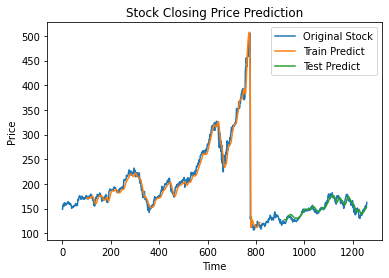

In [33]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label="Original Stock")
plt.plot(trainPredictPlot, label="Train Predict")
plt.plot(testPredictPlot, label = "Test Predict")

plt.title('Stock Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()

plt.show()

In [34]:
len(test_data)

441

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

## Predicting the price for next 30 days

In [37]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11976769]
101
1 day input [0.14053851 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273
 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073
 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186
 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166
 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861
 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675
 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688
 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175
 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742
 0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.096531   0.09843456 0.10487163 0.10299311 0.08966813 0.07586725
 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711
 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879
 0.0952536  0.09773325 0.09680651

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
len(df1)

1259

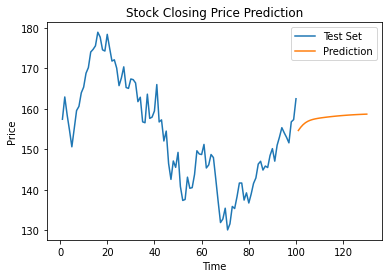

In [40]:
plt.plot(day_new,scaler.inverse_transform(df1[(len(df1)-100):]), label = "Test Set")
plt.plot(day_pred,scaler.inverse_transform(lst_output), label = "Prediction")

plt.title('Stock Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()

Text(0, 0.5, 'Price')

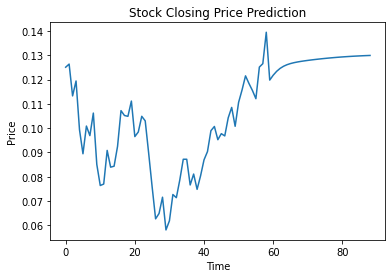

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

plt.title('Stock Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

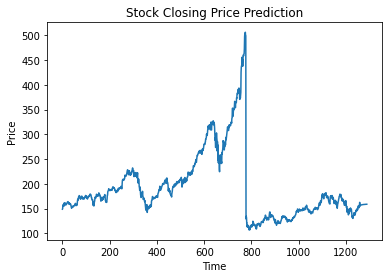

In [42]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

plt.title('Stock Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')